Name: Subhadip Roy

Data Science and Business Analytics Intern @ The Sparks Foundation(TSF)

Topic : Exploratory Data Analysis (EDA) - Terrorism

Dataset : globalterrorismdb_0718dist.csv (https://bit.ly/2TK5Xn5)

Imports

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Data Import

In [86]:
data = pd.read_csv("globalterrorismdb_0718dist.csv")
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Data Cleaning

In [87]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [88]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City',
    'summary':'Summary','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon','nkill':'Kill',
     'nwound':'Wound','target1':'Target','motive':'Motive'},inplace=True)

In [89]:
data = data[['Year','Month','Day','Country','State','Region','City',"Attack_Type",'Kill',
               'Wound','Target','Summary','Group','Target_Type','Weapon','Motive']]


In [90]:
data.head()

,Year,Month,Day,Country,State,Region,City,Attack_Type,Kill,Wound,Target,Summary,Group,Target_Type,Weapon,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [91]:
data.shape

(181691, 16)

In [92]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
City              434
Attack_Type         0
Kill            10313
Wound           16311
Target            636
Summary         66129
Group               0
Target_Type         0
Weapon              0
Motive         131130
dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Attack_Type  181691 non-null  object 
 8   Kill         171378 non-null  float64
 9   Wound        165380 non-null  float64
 10  Target       181055 non-null  object 
 11  Summary      115562 non-null  object 
 12  Group        181691 non-null  object 
 13  Target_Type  181691 non-null  object 
 14  Weapon       181691 non-null  object 
 15  Motive       50561 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 22.2+ MB


Data Visualisation

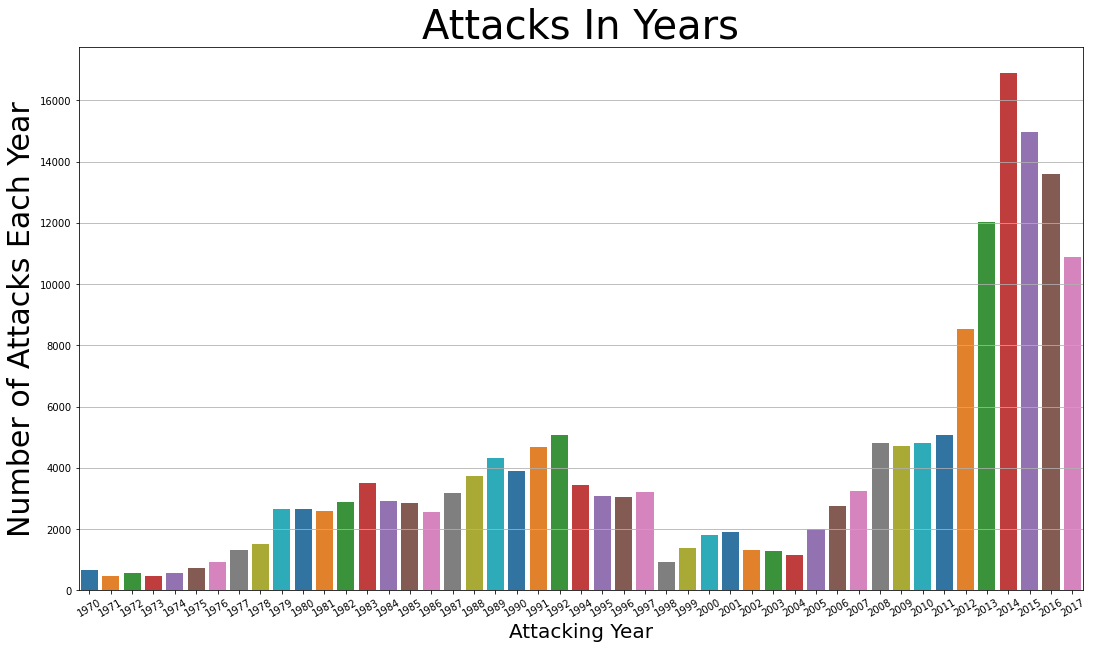

In [94]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 30)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=30)
plt.title('Attacks In Years',fontsize=40)
plt.grid(axis='y')

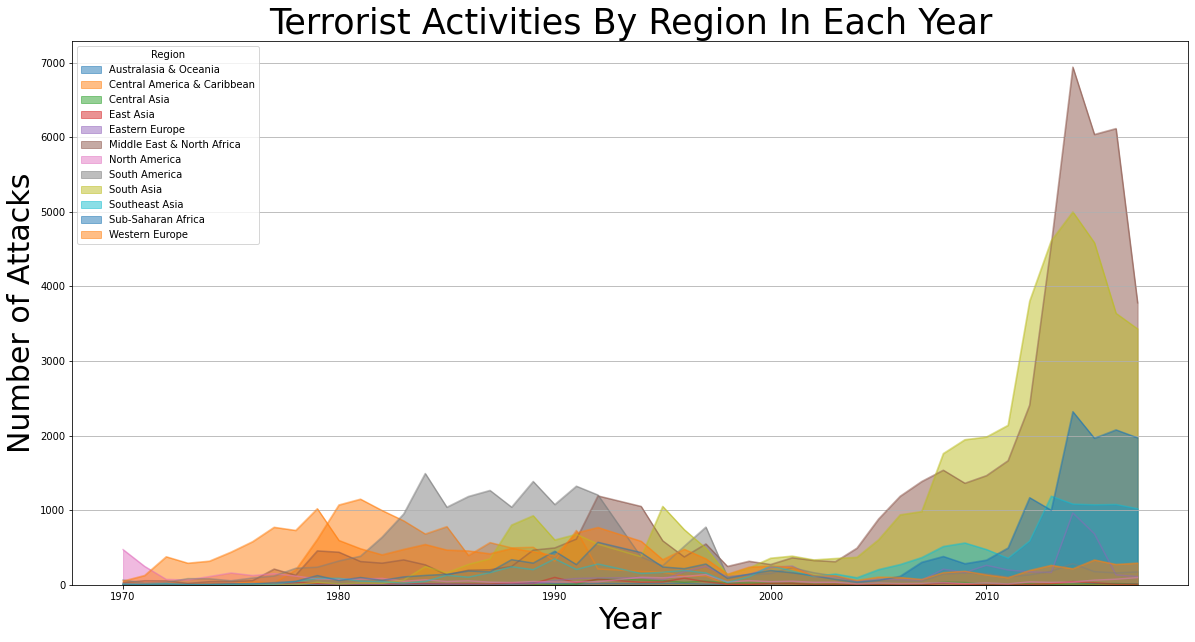

In [95]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=35)
plt.ylabel('Number of Attacks',fontsize=30)
plt.xlabel("Year",fontsize=30)
plt.grid(axis='y')

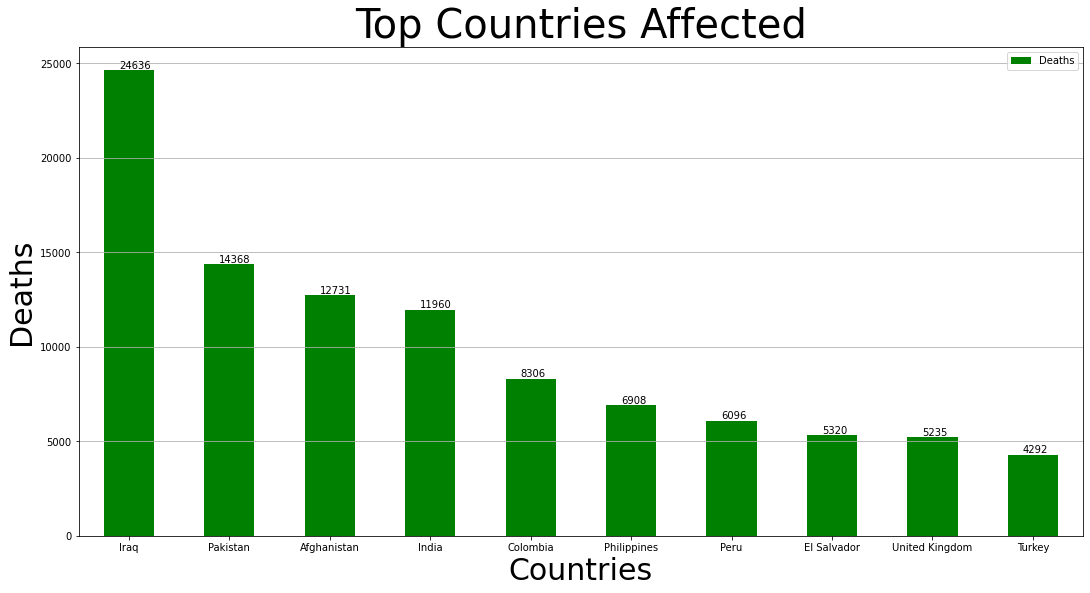

In [96]:
attack = data.Country.value_counts()[:10]
attack.plot(kind='bar',figsize=(18,9),color='green')
i = 1;j = 100
for i in range(len(data.Country[:10])):
    plt.annotate(attack[i], (-0.1 + i, attack[i] + j))
plt.legend(labels = ['Deaths'])
plt.xlabel('Countries',fontsize=30)
plt.ylabel('Deaths',fontsize=30)
plt.title("Top Countries Affected",fontsize=40)
plt.xticks(rotation = 0)
plt.grid(axis='y')

In [97]:
data.Group.value_counts()[1:20]


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

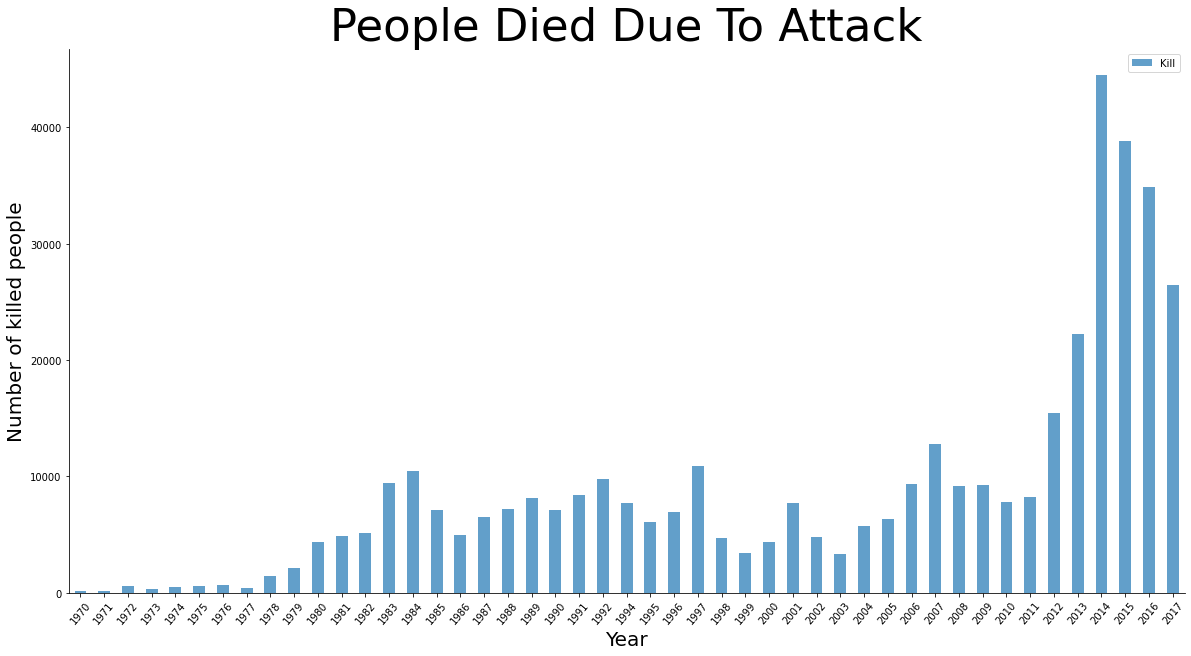

In [98]:
df = data[['Year','Kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=45)
plt.ylabel("Number of killed people",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

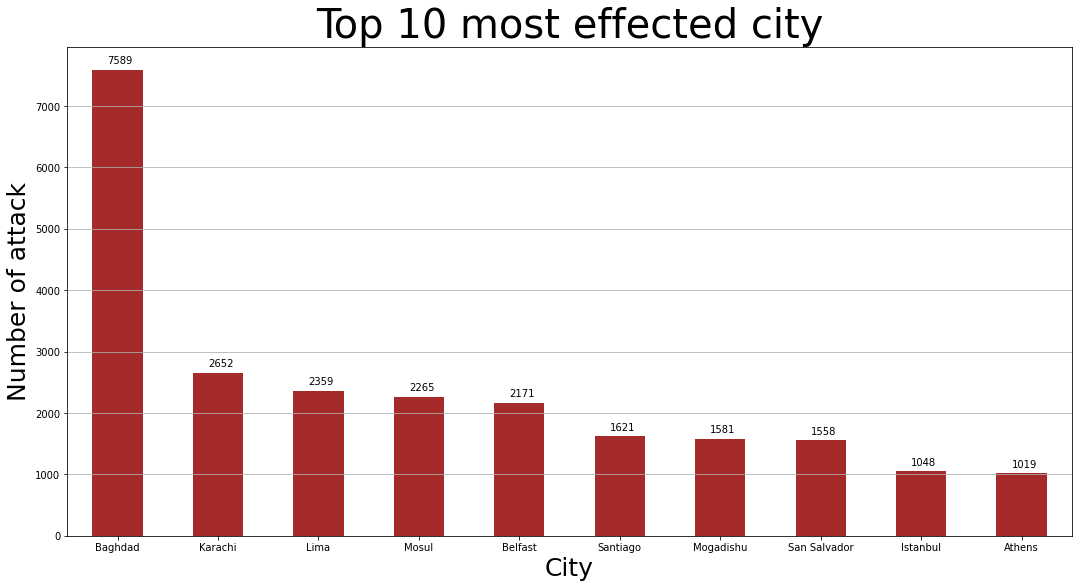

In [99]:
city_affected=data.City.value_counts()[1:11]
city_affected.plot(kind='bar',figsize=(18,9),color='brown')
i = 1;j = 100
for i in range(len(data.City[1:11])):
    plt.annotate(city_affected[i], (-0.1 + i, city_affected[i] + j))
plt.xticks(rotation = 0)
plt.xlabel("City",fontsize=25)
plt.ylabel("Number of attack",fontsize=25)
plt.title("Top 10 most effected city",fontsize=40)
plt.grid(axis='y')

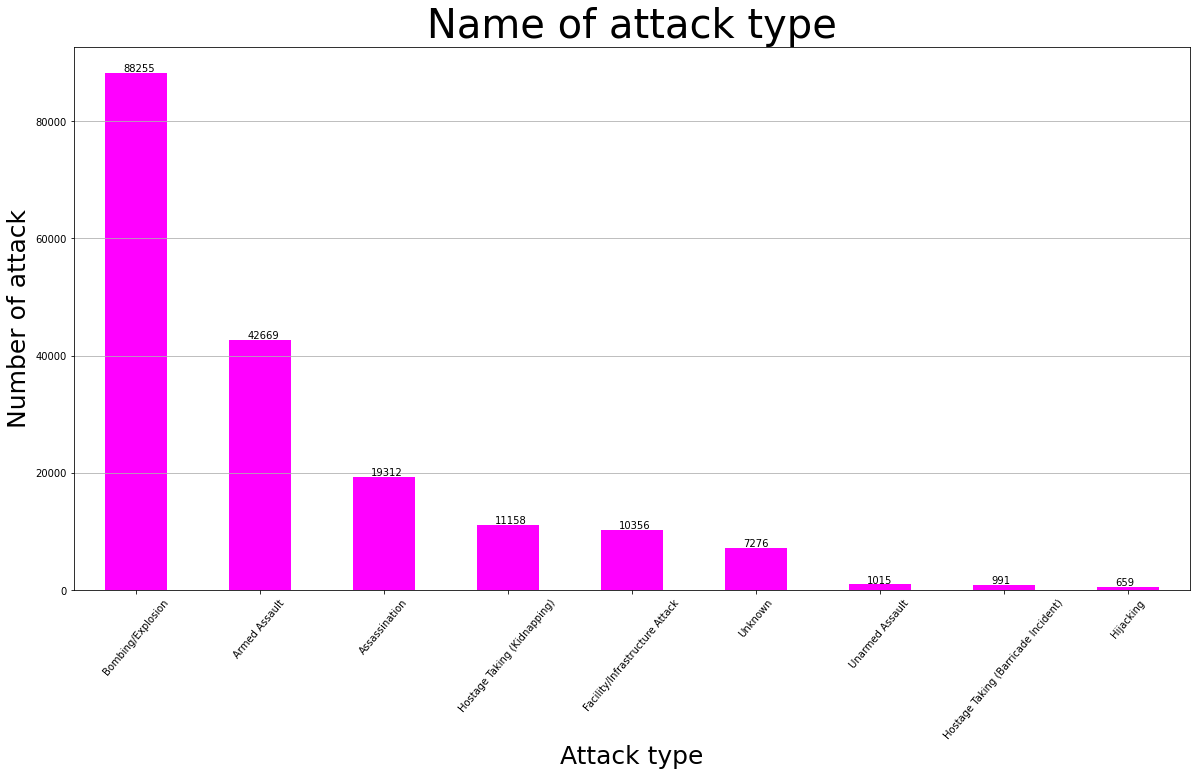

In [100]:
attack_type=data.Attack_Type.value_counts()[0:9]
attack_type.plot(kind='bar',figsize=(20,10),color='magenta')
i = 1;j = 200
for i in range(len(data.Attack_Type[0:9])):
    plt.annotate(attack_type[i], (-0.1 + i, attack_type[i] + j))
plt.xticks(rotation = 50)
plt.xlabel("Attack type",fontsize=25)
plt.ylabel("Number of attack",fontsize=25)
plt.title("Name of attack type",fontsize=40)
plt.grid(axis='y')

In [101]:
data['Wound'] = data['Wound'].fillna(0)
data['Kill'] = data['Kill'].fillna(0)
data['Casualties'] = data['Kill'] + data['Wound']
data[['Attack_Type','Casualties']].groupby(["Attack_Type"]).sum()


,Casualties
Attack_Type,
Armed Assault,237663.0
Assassination,38807.0
Bombing/Explosion,530007.0
Facility/Infrastructure Attack,7407.0
Hijacking,20719.0
Hostage Taking (Barricade Incident),8444.0
Hostage Taking (Kidnapping),30677.0
Unarmed Assault,14907.0
Unknown,47106.0


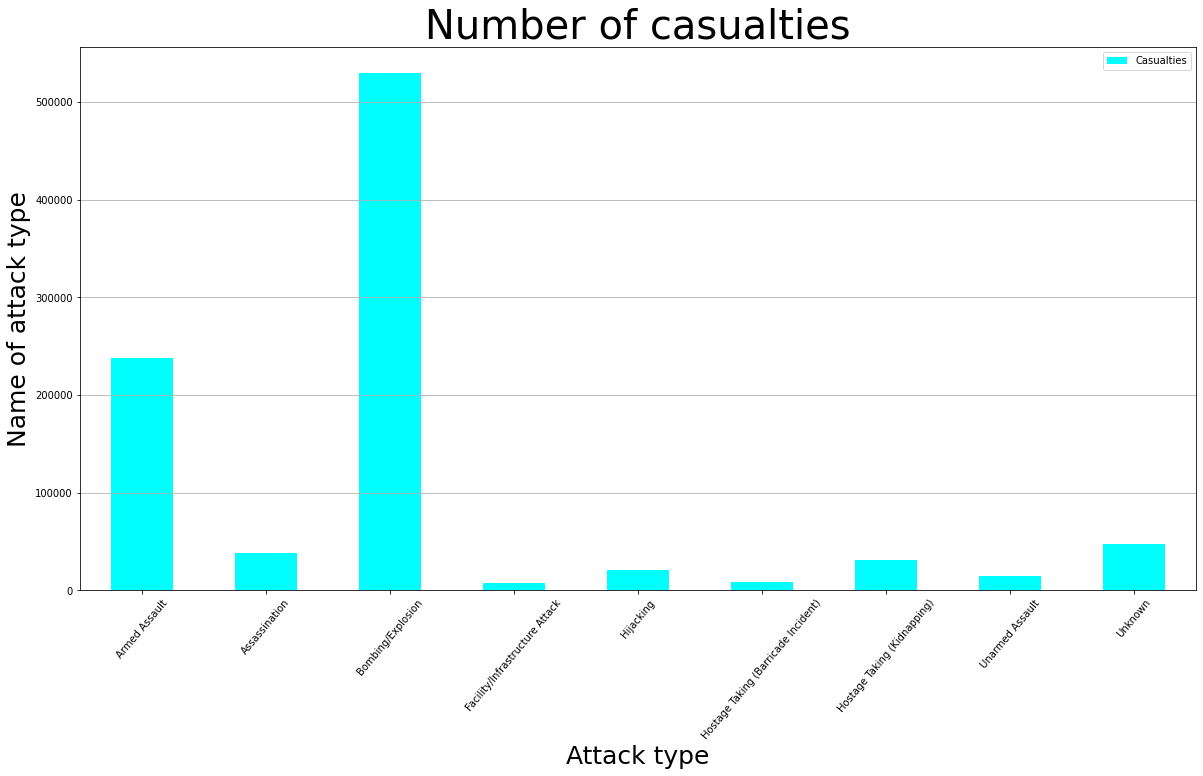

In [102]:
Casualties_by_attack_type=data[['Attack_Type','Casualties']].groupby(["Attack_Type"],axis=0).sum()
Casualties_by_attack_type.plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of casualties",fontsize=40)
plt.ylabel('Name of attack type',fontsize=25)
plt.xlabel('Attack type',fontsize=25)
plt.grid(axis='y')


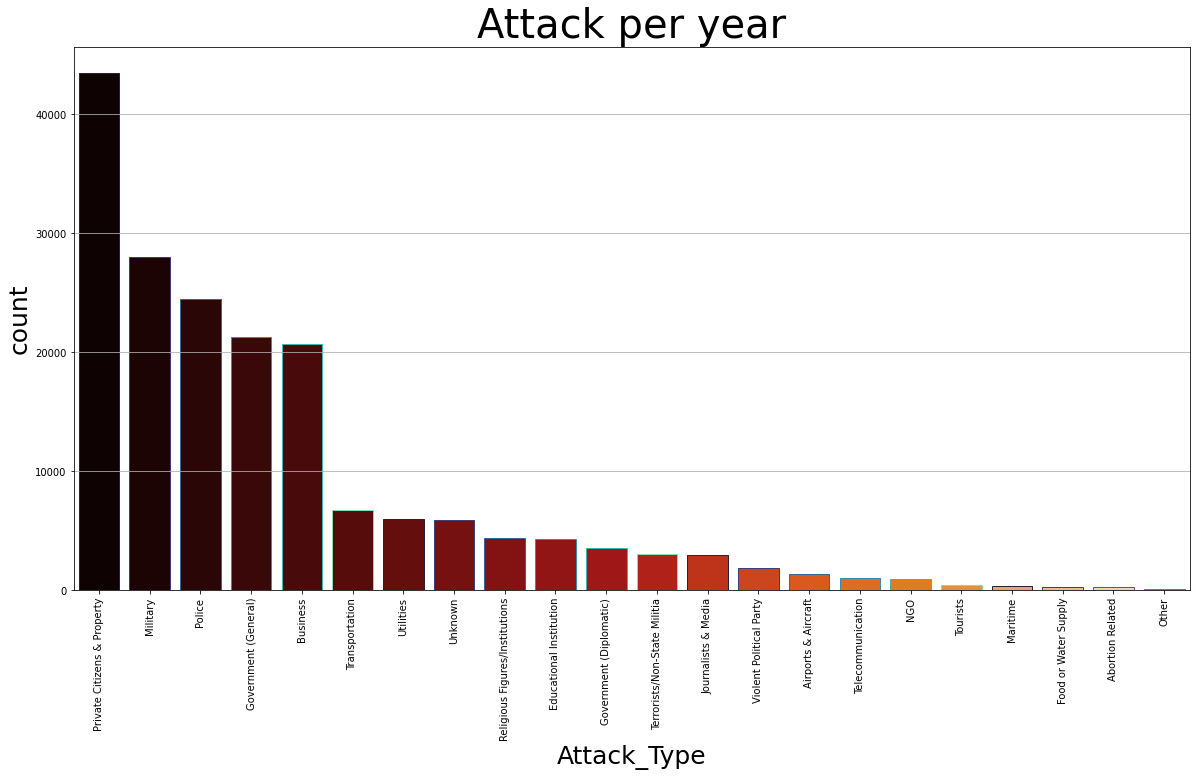

In [103]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Target_Type"],order=data['Target_Type'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attack_Type",fontsize=25)
plt.ylabel("count",fontsize=25)
plt.title("Attack per year",fontsize=40)
plt.grid(axis='y')
plt.show()

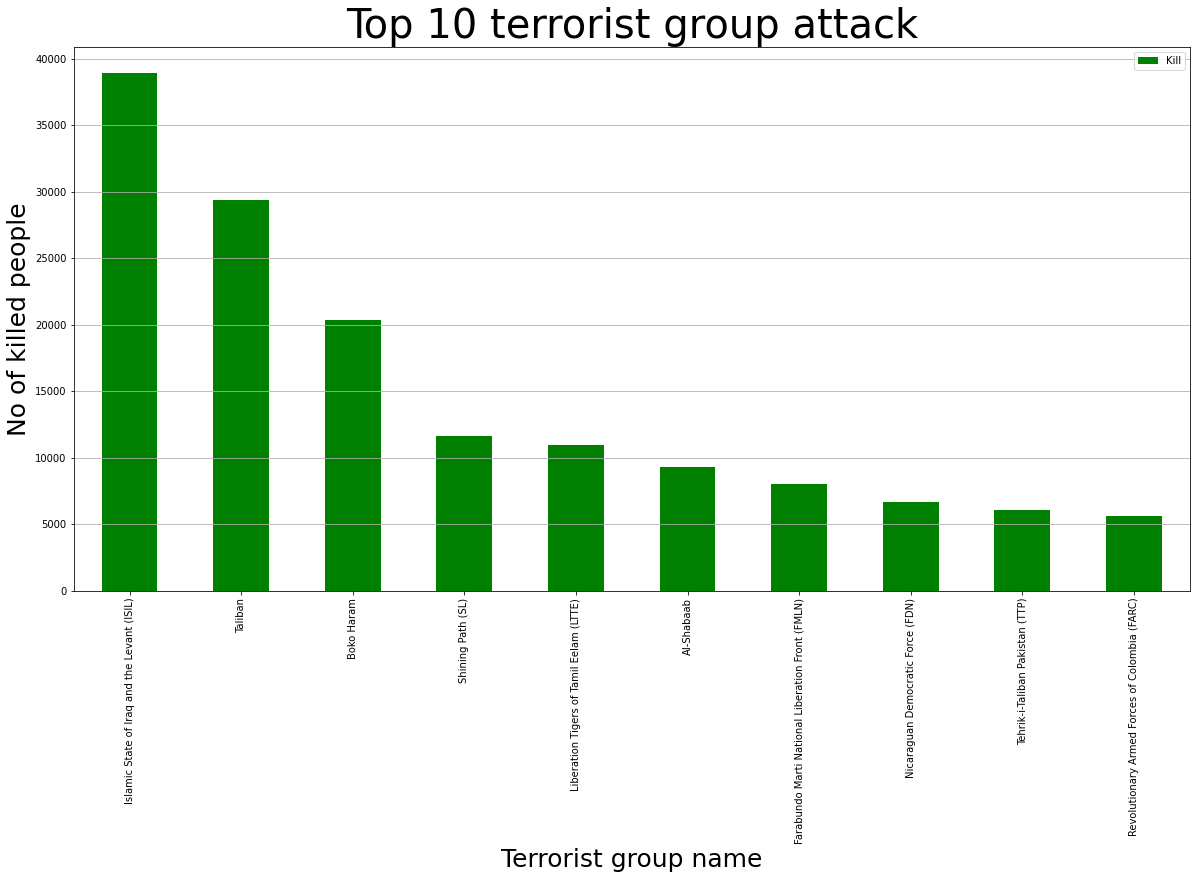

In [104]:
data[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Kill',ascending=False).head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=40)
plt.xlabel("Terrorist group name",fontsize=25)
plt.ylabel("No of killed people",fontsize=25)
plt.grid(axis='y')
plt.show()

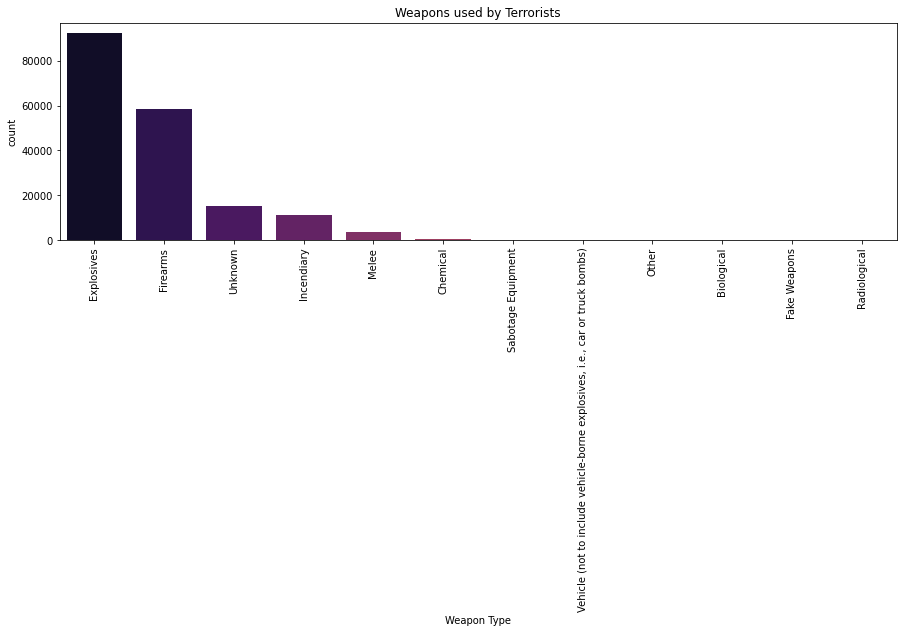

In [105]:
plt.subplots(figsize=(15,4))
sns.countplot(data['Weapon'],data=df,palette='inferno',order=data['Weapon'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()

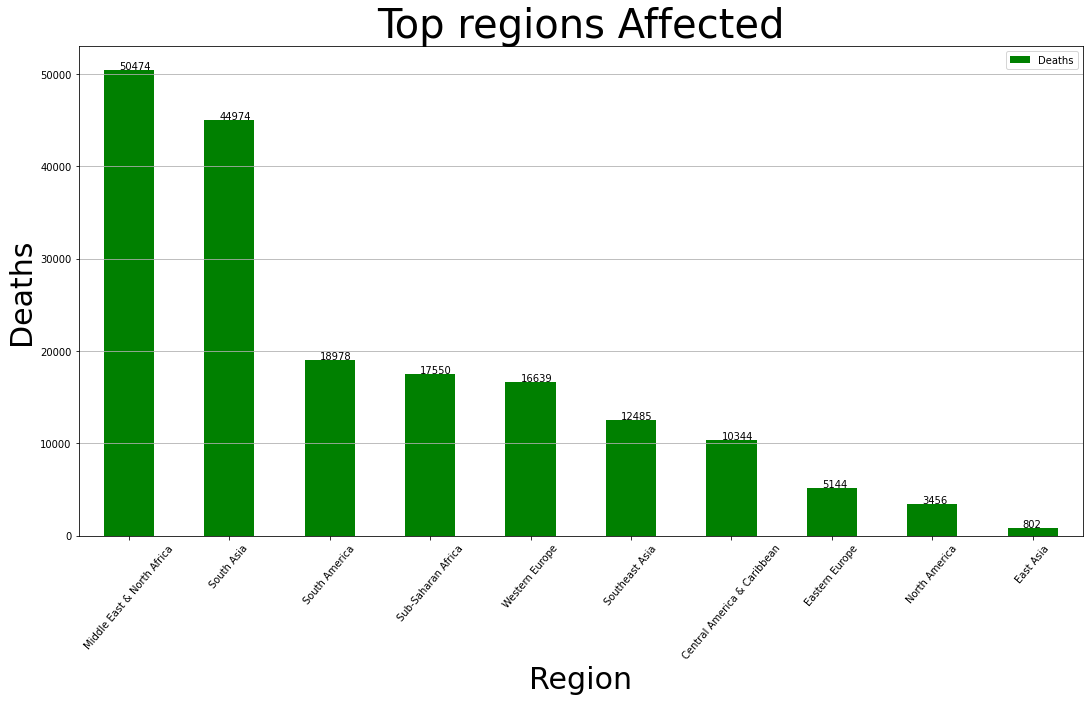

In [106]:

attack = data.Region.value_counts()[:10]
attack.plot(kind='bar',figsize=(18,9),color='green')
i = 1;j = 100
for i in range(len(data.Region[:10])):
    plt.annotate(attack[i], (-0.1 + i, attack[i] + j))
plt.xticks(rotation=50)
plt.legend(labels = ['Deaths'])
plt.xlabel('Region',fontsize=30)
plt.ylabel('Deaths',fontsize=30)
plt.title("Top regions Affected",fontsize=40)
plt.grid(axis='y')
